In [1]:
from pprint import pprint
from sympy import *

In [2]:
init_printing()

In [3]:
y = sympify('m*x + b')
y.subs({'m': 4, 'b': 7}).evalf(subs={'x': 3})

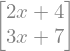

In [4]:
Ax = y.subs({'m': Matrix([2, 3]), 'b': Matrix([4, 7])})
Ax

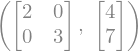

In [5]:
A = Matrix([[2, 0] ,[0, 3]])
b = Matrix([4, 7])
A, b

In [6]:
A.solve(b)

In [7]:
linear_bezier = sympify('t*P_0 + (1 - t) * P_1')
linear_bezier

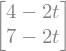

In [8]:
b1 = linear_bezier.subs({'P_0': Matrix([2, 5]), 'P_1': Matrix([4, 7])})
b1

In [9]:
b1[0], b1[1]

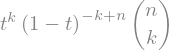

In [10]:
bernstein_polynomial = sympify('binomial(n, k) * t**k * (1 - t)**(n - k)')
bernstein_polynomial

In [11]:
for k in range(4):
    print(f"P_{k} = {bernstein_polynomial.subs({'n': 3, 'k': k})}")

P_0 = (1 - t)**3
P_1 = 3*t*(1 - t)**2
P_2 = 3*t**2*(1 - t)
P_3 = t**3


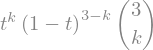

In [12]:
cubic_bernstein_polynomial = bernstein_polynomial.subs({'n': 3})
b3 = cubic_bernstein_polynomial
b3

In [13]:
def get_cubic_bernstein_polynomial(k):
    return b3.subs({'k': k})

for k in range(4):
    print(f'P_{k} = {get_cubic_bernstein_polynomial(k)}')

P_0 = (1 - t)**3
P_1 = 3*t*(1 - t)**2
P_2 = 3*t**2*(1 - t)
P_3 = t**3


In [14]:
p = [Symbol(f'P_{i}') for i in range(4)]
p

In [15]:
cubic_bezier = sum([b3.subs({'k': i}) * p[i] for i in range(4)])
cubic_bezier

In [16]:
from typing import NamedTuple

class Point(NamedTuple):
    x: float
    y: float
    
    def to_vector(self):
        return Matrix([self.x, self.y])

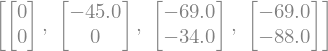

In [17]:
import more_itertools

bezier3_control_points_string = '0.0 0.0 -45.0 0.0 -69.0 -34.0 -69.0 -88.0'
chunked_points = more_itertools.chunked(
                    (float(s)for s in bezier3_control_points_string.split()), 2)
control_points = [Point(*chunk) for chunk in chunked_points]
control_point_vectors = [pt.to_vector() for pt in control_points]
control_point_vectors

In [34]:
control_point_subs = {p: x for p, x in zip((f'P_{i}' for i in range(4)), control_point_vectors)}

for key, value in control_point_subs.items():
    print(f'{key}: {value}')

P_0: Matrix([[0], [0]])
P_1: Matrix([[-45.0000000000000], [0]])
P_2: Matrix([[-69.0000000000000], [-34.0000000000000]])
P_3: Matrix([[-69.0000000000000], [-88.0000000000000]])


In [40]:
# Find the first derivative of the cubic bezier curve
d1b = diff(cubic_bezier.subs(control_point_subs), 't')

d1b.row(0).col(0)

In [21]:
d1b.row(1)

In [22]:
d1b[0]

In [23]:
d1b[1]

In [41]:
# Find the roots of each of the equations 
# (to determine the extrema of the cubic bezier)

solve(d1b[0]), solve(d1b[1])

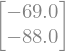

In [25]:
cubic_bezier.subs(control_point_subs).subs({'t': 1})

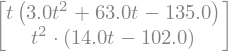

In [26]:
current_bezier = simplify(cubic_bezier.subs(control_point_subs))
current_bezier

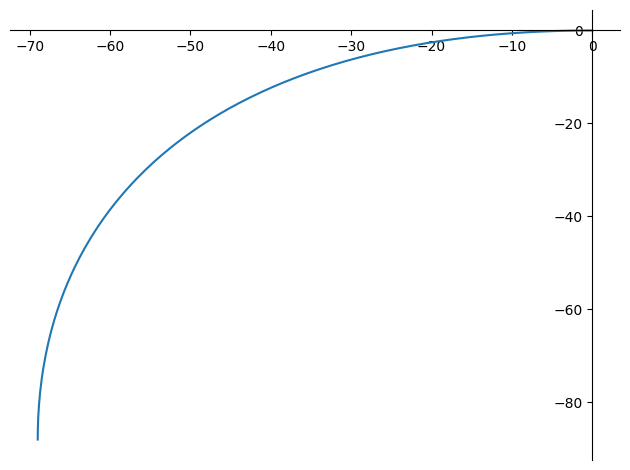

In [27]:
plot_parametric(current_bezier[0], current_bezier[1], ('t', 0, 1))

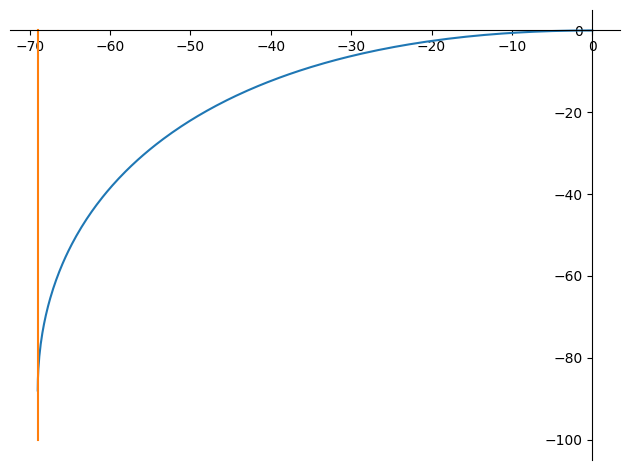

In [28]:
y = symbols('y')
p1 = plot_parametric(current_bezier[0], current_bezier[1], ('t', 0, 1), show=False)
p2 = plot_parametric(-69, y, (y, -100, 0), show=False)
p1.append(p2[0])
p1.show()

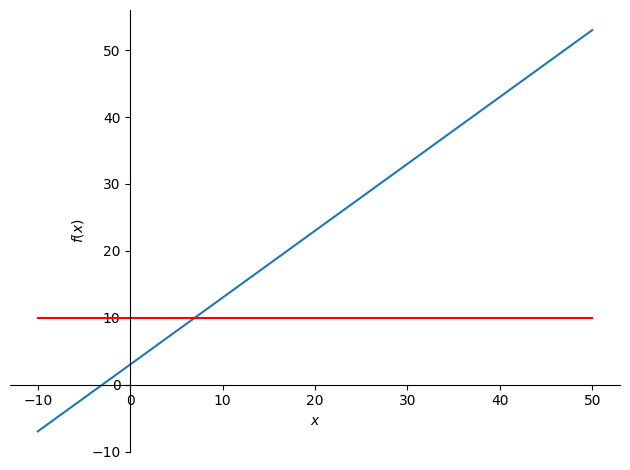

In [29]:
x, y = symbols('x y')
p1 = plot(x + 3, (x, -10, 50), show=False)
p2 = plot(10, (y, -10, 50), show=False, line_color='red')
p1.append(p2[0])
p1.show()

In [30]:
from lxml import etree

In [31]:
lines = """M 218 136
        c 66 0 108 -36 108 -89
        c 0 -89 -113 -183 -218 -183
        c -66 0 -108 36 -108 89
        c 0 89 113 183 218 183""".splitlines()

lines = (line.strip() for line in lines)
command_dicts = (line.split() for line in lines)
command_dicts = [{'command': d[0], 
            'points':[float(s) for s in d[1:]]} for d in command_dicts]
command_dicts

[{'command': 'M', 'points': [218.0, 136.0]},
 {'command': 'c', 'points': [66.0, 0.0, 108.0, -36.0, 108.0, -89.0]},
 {'command': 'c', 'points': [0.0, -89.0, -113.0, -183.0, -218.0, -183.0]},
 {'command': 'c', 'points': [-66.0, 0.0, -108.0, 36.0, -108.0, 89.0]},
 {'command': 'c', 'points': [0.0, 89.0, 113.0, 183.0, 218.0, 183.0]}]

In [32]:
from io import StringIO
from functools import partial

class Point(NamedTuple):
    x: float
    y: float


class Command(NamedTuple):
    command: str
    points: list
    
    def __repr__(self):
        type_name = type(self).__name__
        leading_space = (len(type_name) + 1) * ' '
        leading_space_points = f'{leading_space}        '
        
        with StringIO() as sp:
            prints = partial(print, file=sp)
            prints(f'{type_name}(command={self.command}', end='')
            match len(self.points):
                case 0:
                    prints(')')
                case 1:
                    prints(f',\n{leading_space}points=[{self.points[0]}])')
                case _:
                    prints(f',\n{leading_space}points=[{self.points[0]},')
                    for point in self.points[1:-1]:
                        prints(f'{leading_space_points}{point},')
                    prints(f'{leading_space_points}{self.points[-1]}])')
            return sp.getvalue()           
    
def chunk_points(points):
    return more_itertools.chunked(points, 2)

def points_as_pairs(chunked_points):
    return [Point(*tuple(p)) for p in chunked_points]

def get_commands(command_dicts):
    for d in command_dicts:
        chunked_points = list(chunk_points(d['points']))
        yield Command(command=d['command'], 
                      points=points_as_pairs(chunked_points))
    
commands = list(get_commands(command_dicts))
commands

[Command(command=M,
         points=[Point(x=218.0, y=136.0)]),
 Command(command=c,
         points=[Point(x=66.0, y=0.0),
                 Point(x=108.0, y=-36.0),
                 Point(x=108.0, y=-89.0)]),
 Command(command=c,
         points=[Point(x=0.0, y=-89.0),
                 Point(x=-113.0, y=-183.0),
                 Point(x=-218.0, y=-183.0)]),
 Command(command=c,
         points=[Point(x=-66.0, y=0.0),
                 Point(x=-108.0, y=36.0),
                 Point(x=-108.0, y=89.0)]),
 Command(command=c,
         points=[Point(x=0.0, y=89.0),
                 Point(x=113.0, y=183.0),
                 Point(x=218.0, y=183.0)])]